# (TH) Deep Learning with More Sensation
> แล้วถ้าเราอยากจะสร้าง Deep Learning program ขึ้นมาจริงๆจะต้องทำยังไงนะ

- toc: true 
- badges: false
- comments: true
- categories: [deep learning]
- author: Burin Sirisrimungkorn

In [22]:
# hide
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as let_show
import math
np.random.seed(1)

# เมื่อต้องเผชิญหน้ากับ Dataset
เมื่อเราต้องการที่จะสร้าง neural network program สิ่งที่เราต้องมีก็คือ dataset เปรียบได้กับมันคือคลังข้อมูลที่รอให้เราได้เข้าไปเรียนรู้ พอเราจบการเรียนรู้ เราก็จะมีความสามารถในการทำหรือแก้ปัญหาสิ่งนั้นๆตามที่เราได้เรียนหรือศึกษามา 
## MNIST Dataset 
dataset อันนี้จะเป็นการรวมข้อมูลเกี่ยวกับ ตัวเลขที่ถูกเขียนด้วยลายมือมนุษย์ โดยได้มีการเก็บรวบรวมโดย National Institute of Standards and Technology และได้ถูกทำมาจัดรูปแบบและแก้ไขปรับปรุงให้เป็น dataset ที่ใช้สำหรับ machine learning โดย Yann Lecun 
MNIST ได้ถูก Yann Lecun นำไปใช้ในปี 1998 สำหรับการสร้าง neural network ซึ่ง LeNet-5 คือ program ตัวแรกที่ใช้สำหรับการจัดกลุ่มตัวเลขที่เขียนด้วยลายมือมนุษย์ นี่เป็นเหตุการณ์สำคัญอีกหน้าหนึ่งของประวัติศาสตร์ AI
## โอเค โอเค เรามาลุยกันเลย

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print(f"จำนวนข้อมูลใน Training set: {x_train.shape[0]}")
print(f"จำนวนข้อมูลใน Testing set: {x_test.shape[0]}")

จำนวนข้อมูลใน Training set: 60000
จำนวนข้อมูลใน Testing set: 10000


เราทำการโหลดข้อมูล MNIST จาก Keras ซึ่งเป็น framework ที่ใช้สำหรับสร้าง neural network program โดย Keras จะมี datasets ที่เตรียมไว้ให้บางส่วน (MNIST ก็เป็นหนึ่งในนั้น) จะสังเกตได้ว่าข้อมูลจะถูกแบ่งแยกออกมาเป็น 2 ส่วนนั่นคือ training และ testing set ทำไมกันนะ?
อย่างที่เรารู้ในตอนนี้คือ เราพยายามจะสร้าง prgram ด้วยข้อมูล เมื่อผลลัพธ์ทดสอบดูกับข้อมูลที่เราใช้สร้างแล้วความสามารถในการให้คำตอบเราดีเยี่ยม แต่ แต่... นี่ก็ไม่ได้การันตีว่า พอเรานำไปใช้จริงกับข้อมูลที่ไม่ได้อยู่ในกลุ่ม training จะเกิดอะไรชึ้น ดังนั้น เราเลยต้องมีข้อมูลอีกกลุ่มมาทำเพื่อทำการทดสอบว่าถ้าเป็นข้อมูลที่ไม่ได้อยู่ในกลุ่มที่ใช้เรียนรู้ ความรู้หรือ program ที่เราได้มา ยังจะสามารถแก้ไขปัญหาได้อย่างถูกต้องไหม 
> Note: แน่นอนว่า training และ testing set ข้อมูลข้างในจะต้องไม่ใช่ตัวเดียวกัน แต่คุณลักษณะของข้อมูลทั้ง 2 กลุ่มยังต้องใกล้เคียงกัน (มาจาก statistical distribution เดี่ยวกัน) เราคงไม่สามารถเอาความรู้ที่เรียนจากภาพถ่ายรูปมุมหนึ่ง ไปใช้กับปัญหาที่เป็นรูปประเภทเดียวกันแต่ถ่ายจากอีกมุมนึงที่ไม่ปรากฏในคลังข้อมูลที่ใช้เรียนรู้

นอกจากที่ถ้าสังเกตเห็นมันจะมีข้อมูลอีก 2 ตัวแปรที่ขึ้นต้นด้วย "y" มันคืออะไรกันนะ? จริงๆแล้วมันหมายถึงตัวแปรที่เก็บ labels หรือก็คือคำตอบที่ถูกผูกติดกับตัวอย่าง โดยในแต่ละตัวอย่างก็จะถูกผูกกับ label เอ๊ะแล้วค่าในตัวอย่างมันเป็นอะไรได้บ้าง?
เราจะประกาศว่าคำตอบของปัญหานี้เป็นอะไรได้บ้างซึ่งแต่ละคำตอบเราจะเรียกว่า class ดังนั้น MNIST ที่มีคำตอบที่เป็นไปได้คือ 0 - 9 จะมีคำตอบทั้งหมด 10 คำตอบ ถ้าเรามองเป็น predefined set of classes จะได้เป็น {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
 
## มาลองดูตัวอย่างกัน
เดี๋ยวเราลองมาดูตัวอย่างแรกของ training set กัน

มันคือเลข 5
รูปภาพมีขนาด 28 x 28


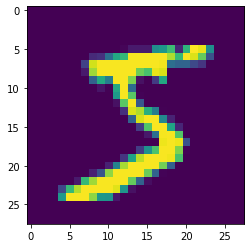

In [3]:
# hide
print(f"มันคือเลข {y_train[0]}")
print(f"รูปภาพมีขนาด {x_train.shape[1]} x {x_train.shape[2]}")
let_show.imshow(x_train[0])

จากภาพและผลลัพธ์จะเห็นได้ว่าตัวอย่างอันแรกใน training set เป็นเลข 5 โดยภาพมีขนาด 28 x 28 (height x width เนื่องจาก numpy จะแสดง row ก่อนแล้วค่อย column) แต่ก่อนที่เราจะเริ่มสร้าง neural network program กัน เราต้องทำอะไรเพิ่มอีกหน่อย

- ทำการ preprocess ค่าของแต่ละตัวอย่าง
- ทำการแปลงคำตอบให้อยู่ในรูปของ vector

# ทำการ Preprocess รูปภาพ
ตอนนี้ค่าที่อธิบายถึงรูปภาพเรามีค่าเป็นยังไงนะ

In [4]:
#hide
print(x_train[0, 0:14, 0:14])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253]
 [  0   0   0   0   0   0   0   0  80 156 107 253 253 205]
 [  0   0   0   0   0   0   0   0   0  14   1 154 253  90]
 [  0   0   0   0   0   0   0   0   0   0   0 139 253 190]
 [  0   0   0   0   0   0   0   0   0   0   0  11 190 253]
 [  0   0   0   0   0   0   0   0   0   0   0   0  35 241]]


จะเห็นว่ามีค่าตั้งแต่ 0 จนถึง 253 (จริงๆค่าที่เป็นไปได้มากสุดคือ 255 เนื่องจากข้อมูลเก็บเป็น unsign 8 bits) แล้วแบบนี้หมายความว่ายังไง เวลา program เราเรียนรู้ กลุ่มตัวแปรที่มีค่ามากจะเป็นตัวแปรที่มีอำนาจในการตัดสินให้คำตอบ ทั้งที่ตัวแปรอื่นๆที่ค่าน้อยก็มีโอกาสที่เป็นตัวแปรที่มีความสำคัญต่อการผลิตคำตอบ ซึ่งมีผลกับการเรียนรู้ ดังนั้นเราต้องนำค่าตัวแปรต่างๆที่ใช้อธิบายรูปภาพมาทำการ normalization โดยในกรณีนี้คือนำค่าทั้งหมดมาหารด้วย 255 ซึ่งการทำอย่างนี้นอกจากจะทำให้ความสำคัญของแต่ละตัวแปรมีน้ำหนักพอๆกันแล้ว ยังช่วยให้เรียนรู้ได้เร็วขึ้นด้วย (จินตนาการว่ากราฟแสดงความสัมพันธ์ระหว่าง error และ weight 2 ตัว ที่การส่ายไปส่ายมาแทนที่จะตรงไปยังจุดที่เป็นเป้าหมาย)

In [5]:
# hide
print(x_train[0, 0:14, 0:14] / 255)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.01176471 0.07058824]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.11764706 0.14117647 0.36862745 0.60392157
  

เดี๋ยวเรามาทำการ normalization รูปภาพทั้งหมดกันทั้งใน training และ testing set

In [6]:
x_train = x_train / 255
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))[11000:12000]

x_test = x_test / 255
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

print(f"มาดูข้อมูลรูปภาพใน training set กัน :{x_train.shape}")
print(f"มาดูข้อมูลรูปภาพใน testing set กัน :{x_test.shape}")

มาดูข้อมูลรูปภาพใน training set กัน :(1000, 784)
มาดูข้อมูลรูปภาพใน testing set กัน :(10000, 784)


จะเห็นว่าเราทำการหารด้วย 255 เพื่อทำให้ตัวแปรต่างๆในแต่ละรูปภาพมีความสำคัญต่อคำตอบพอๆกัน นอกจากนี้ถ้าจำได้ neural netwrok program จะรับ inputs เข้ามาเป็น 1D list หรือ vector เนื่องจากรูปภาพเราถูกนำเสนอเป็น 28 x 28 เราทำการแปลงเป็น vector โดยการใช้ reshape method ซึ่งเป็นฟังก์ชันที่ใช้สำหรับปรับ representation ของ array ในกรณีนี้เราปรับจากการนำเสนอในรูปแบบ metric เป็น vector
โดยถ้าสังเกตใน training set จาก 60,000 ตัวอย่าง ในกรณีนี้ผมหยิบมาแค่ 1,000 ตัวอย่างสำหรับใช้สร้าง neural network program (เพ่ือความเร็ว)ถ้าต้องการใช้ตัวอย่างทั้งหมดก็ทำการลบในส่วนการเลือกตัวอย่างออกไปนะครับ ส่วน testing set ยังคงจำนวนตัวอย่างไว้เท่าเดิม
# ทำไมเราต้องทำการแปลงคำตอบให้อยู่ในรูปของ Vector ?
สังเกตว่าถ้าปัญหาเรามีคำตอบเดียวเราจะแทนที่ด้วย output node แค่ node เดียวแต่ถ้าเรามีหลายคำตอบเราจะมี output nodes มากกว่า 1 node ทำไมเราไม่ใช้ node เดียวแล้วให้ค่าคำตอบเป็น 0 - 9 ละ?
เนื่องจากถ้าเราทำแบบนั้น เท่ากับเราบอก program เราด้วยว่าความสัมพันธ์ระหว่างคำตอบของเราจะมี semantic relationship นั่นคือ คำตอบที่เป็นเลข 8 มีค่ามากกว่า เลข 7 ซึ่งความจริงถ้ามองในมุมตัวเลขก็ถูก และนอกจากนี้คำตอบที่เราได้ยังมีโอกาสที่จะเป็นค่าระหว่างคำตอบจริงๆที่เราต้องการ เช่นคำตอบออกมาเป็น 7.5 แต่คราวนี้ถ้ามองใบริบทที่เรากำลังทำอยู่ เราต้องการแค่อยากรู้ว่าจากรูปที่ได้มาตัว program ต้องบอกเราให้ได้ว่ามันเป็นเลขอะไรโดยไม่สนว่าเลขนั้นจะมีค่ากว่าอีกเลขไหม
> Note: คำตอบในกรณี MNIST เป็น discrete value และไม่มีความสัมพันธ์กันระหว่าง value


ซึ่งจะนำไปสู่เรื่องของการเลือกแสดงคำตอบของ output layer โดยถ้าคำตอบเราเป็น numeric หรือเป็น continuous value เราก็สามารถนำเสนอ output layer ได้ด้วย node เดียวให้คำตอบเป็น numeric ในช่วงคำตอบที่สนใจ เช่น [-1, 1] ใช้สามารถ tanh เป็น activation function หรือถ้าไม่มีการกำหนดขอบเขตตายตัวก็ไม่ต้องมี activation function แต่ถ้าคำตอบที่เราต้องการเป็น category หรือ predefined set of classes จะทำให้ output layer เราต้องนำเสนอด้วย nodes ที่มีจำนวนเท่ากับ classes โดยในแต่ละ node จะให้ค่าออกเป็นความน่าจะเป็นว่ามีโอกาสเป็น class นี้หรือเปล่า โดยจะเป็น unrelated probability (แต่ละ node มีความน่าจะเป็นของตัวเองไม่เกี่ยวข้องกัน เช่น sigmoid function) หรือ related probability (แต่ละ node ใน layer มีความน่าจะเป็นที่เกี่ยวข้องกัน เช่น การใช้  softmax function)

สรุปคือคำตอบของปัญหา MNIST เป็นแบบ discrete value และ order ไม่สำคัญเนื่องจากไม่มีความสัมพันธ์ระหว่าง class ดังนั้นเราจะทำการแปลงจากข้อมูลปัจจุบันที่แสดงคำตอบเป็นค่าๆเดียว {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} ให้เป็น vector ที่แต่ละ node คือตัวแทนว่าเป็น node ที่บ่งบอกถึงเลขอะไร เช่น node ที่ 0 เป็นตัวแทนของเลข 0 ส่วน node ที่ 8 เป็นตัวแทนของเลข 8 โดยค่าในแต่ละ node บ่งบอกถึงความน่าจะเป็นที่จะเป็นเลขนั้น 
ขอยกตัวอย่างเช่นเลข 8 เมื่อเราทำการแปลงเป็น vector จะได้เป็น [0, 0, 0, 0, 0, 0, 0, 0, 1, 0] จะเห็นได้ว่า node ที่ไม่ได้เป็นคำตอบจะถูกแทนที่ค่าด้วย 0 ส่วน node ที่เป็นคำตอบจะถูกแทนที่ค่าด้วย 1 ถ้าลองแปลงตัวเลขอื่นๆด้วยจะทำให้เราเห็นรูปแบบบางอย่างนั่นคือตัวเลขที่ไม่ใช่คำตอบจะเป็น 0 ทั้งหมด และตัวเลขที่เป็นคำตอบจะเป็น 1 และ! เนื่องจากคำตอบเรามีแค่คำตอบเดียว node ที่เป็น 1 เลยมีแค่ node เดียวที่เหลือเป็น 0 เราเลยเรียกการแปลงข้อมูลจาก numeric เป็น vector ว่าการทำ one hot encoder แน่นอว่าเรานำเสนอข้อมูลอบบนี้ในกรณีที่ปัญหาเราเป็นแบบ multiclass problem นั่นคือมีแค่คำตอบเดียวที่ถูกต้องจากทั้งหมด แต่... ถ้าปัญหาเราเป็น multilabel multiclass หรือจากคำตอบทั้งหมดสามารถตอบได้มากกว่า 1 คำตอบ node ที่เป็น 1 ก็จะมีมากกว่า 1 node

โอเค เรามาลองทำการ one hot encoder กันดีกว่า

In [7]:
y_train_one_hot = np.zeros(shape=(y_train.shape[0], 10))

for i in range(y_train_one_hot.shape[0]):
    y_train_one_hot[i][y_train[i]] = 1

y_train = y_train_one_hot[11000:12000]
print(f"มาดูข้อมูลคำตอบใน training set กัน :{y_train.shape}")
print(f"คำตอบของตัวอย่างแรกคือ {y_train[0]} นั่นคือเลข 5 นั่นเอง")

มาดูข้อมูลคำตอบใน training set กัน :(1000, 10)
คำตอบของตัวอย่างแรกคือ [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] นั่นคือเลข 5 นั่นเอง


แรกเริ่มเราทำการสร้างโครงสร้างของ vectors ราออกมาก่อน(metric เมื่อนำเอา vectors ทั้งหมดมารวมกันเป็นคลังข้อมูลเกี่ยวกับคำตอบ)นั้นคือกำหนดให้แต่ละ vector ที่เป็นตัวแทนของคำตอบในแต่ละตัวอย่างให้ทุก nodes เป็น 0 หมด หลังจากนั้นเราจะไล่แทนค่า 1 คำไปยัง node ที่เป็นตัวแทนคำจอบของแต่ละตัวอย่าง (ในกรณีนี้ vector นึงจะมี node เดียวที่เป็น 0 เนื่องจากคำตอบที่ถูกต้องมีเพียงคำตอบเดียว)
เรามาทำแบบเดียวกันกับคำตอบ testing set กันดูบ้าง

In [8]:
y_test_one_hot = np.zeros(shape=(y_test.shape[0], 10))

for i in range(y_test_one_hot.shape[0]):
    y_test_one_hot[i][y_test[i]] = 1

y_test = y_test_one_hot
print(f"มาดูข้อมูลคำตอบใน testing set กัน :{y_test.shape}")
print(f"คำตอบของตัวอย่างแรกคือ {y_test[0]}")

มาดูข้อมูลคำตอบใน testing set กัน :(10000, 10)
คำตอบของตัวอย่างแรกคือ [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


จะเห็นได้ว่าเราเปลี่ยนคำตอบที่แสดงในรูปแบบ numeric ให้กลายเป็น one hot vector ได้สำเร็จ
## ก่อนมาเริ่มทำการสร้าง Neural Network program มารู้จัก Activation function กันก่อน
ก่อนอื่นในแต่ละ layer (ที่ไม่ใช่ output layer) เรายังไม่มีการใช้ activation function ในรอบนี้เราจะมาใช้กัน โดย function ที่เราจะใช้ก็คือ relu นั่นเอง ฟังก์ชันมีความง่ายมากนั่นคือ ถ้าค่ามากกว่า 0 ให้ทำการคงคำตอบค่าเดิมเอาไว้ แต่ถ้าค่าน้อยกว่าหรือเท่ากับ 0 ให้ทำการแปลงคำตอบให้กลายเป็น 0 
> Warning: ทำไมต้อง activation function หรือให้เฉพาะเจาะจงทำไมต้อง non linear activation function เนื่องจากถ้าเราไม่มี function นี้ ตัวโปรแกรมเราถึงแม้จะเป็น neural network ที่มี 10 layers ก็ไม่ช่วยอะไรเนื่องจาก neural network แค่ 2 layers ก็สามารถให้คำตอบเดียวกับ neural network ที่มี 10 layers ลองคิดในแง่ของ correlation ว่าถ้า weights คือ correlation ระหว่าง layers โดยจุดประสงค์หลักของ program ในการเรียนรู้คือการหา correlation ระหว่าง inputs และ outputs ถ้าเราไม่มี non linear activation function จะทำให้ correlation ในแต่ละช่วงของตัวโปรแกรม (ในกรณีนี้เรามี hidden layer) สุดท้ายก็ขึ้นอยู่กับ  correlation ที่มีกับ inputs layer (นี่แหละ! ที่ทำให้ถึงแม้เรามี layer เยอะแค่ไหนก็ตาม คำตอบสุดท้ายก็สามารถผลิตได้ด้วย program ที่มีแค่ input และ output layer) แต่ถ้าเรามีการใช้ activation function นั้นเท่ากับว่าในแต่ละ layer มีสิทธิ์ที่จะสร้าง correlation ของตัวเองขึ้นมา โดยไม่ได้ขึ้นอยู่กับแค่ฝั่งของ input layer ทำให้เราสามารถสร้าง correlation ที่ซับซ้อน และสุดท้ายก็สร้าง indirect correlation ได้ โดย correlation จาก input layer เป็นแค่ส่วนหนึ่งของ correlation ทั้งหมด ที่ตัวโปรแกรมพยายามสร้างขึ้นมา (ไม่เหมือนกับการใช้ correlation โดยตรงระหว่าง input layer และ output layer) 


เหตุผลว่าทำไมต้อง activation function ผมขอลองใช้การเปรียบเทียบดูนะครับ จินตนาการดูครับว่า เรามีสร้อยคออันนึงเล็กๆแต่อยากกจะเซอไพส์แฟน แต่ในตอนนี้มีแค่กระดาษ A4 จำนวนนึง (หากล้องของขวัญไม่ทันแล้ว) เราก็เลยคิดว่างั้นเอาเลยละกัน เราเอา A4 ห่อสร้อยเอาไว้หลายๆชั้นและมีการขยัมให้เป็นก้อนกลมๆ พอเราส่งให้แฟน แฟนก็ตอบว่า "มันคืออะไรเนี่ย" แฟนมี 2 ตัวเลือกคือ 

- คลี่
- ดีด

โดยการคลี่หนึ่ง ครั้งเรามองเป็น 1 step และการดีดหนึ่งครั้งก็มองเป็น 1 step ดุแล้วปัญหานี้ก็เป็นปัญหาที่ซับซ้อนพอควรเพราะเราต้องคลี่ด้วยมุม, แรงและทิศทางที่ไม่มีกำหดตายตัวจนกระทั้งเจอสสร้อย ทุกครั้งที่เราคลี่เราเปลี่ยนแปลง representation ทุกครั้ง เราคลี่ไปเรื่อยๆ แล้วหยุดคิดแปปนึงว่าจาก representation ปัจจุบันของก้อนกระดาษที่ห่อสร้อยกับก้อนกระดาษที่ผ่านการคลี่แค่ครั้งเดียวก่อนหน้านี้ จะเห็นว่าเรามาไกลแค่ไหนและการคลี่ของเราเมื่อมองมันเป็น list ของ actions มีความซับซ้อนเมื่อเทียบกับตอนเราพึ่งจะคลี่ไปรอบเดียว แต่เราไม่รู้สึกถึงความซับซ้อนเพราะแต่ละ step เราทำแค่ขั้นตอนง่ายๆคือการคลี่ แต่ถ้าเรายังไม่เริ่มคลี่แล้วต้องการทำการคลี่ทีเดียวเพื่อให้ได้ผลลัพธ์เหมือนกับที่เราคลี่ไปแล้ว 25 ครั้ง มันจะเป็นคู่มือขั้นตอนที่ซับซ้อนมากในการทำทีเดียว จะเห็นว่าแต่ละ step ก็เหมือนแต่ละ layer ของ neural network program และการคลี่ก็คือ non linear actibation function ซึ่ง function นี้ผลลัพธ์คือการสะสมความซับซ้อนขึ้นทีละนิด

แต่ถ้าเราใช้ linear activation function หรือไม่ใช้เลยละ มันก็จะเปรียบได้กับการดีดก้อนกระดาษที่ห่อสร้อย representation เราเปลี่ยนนั่นคือก้อนมีการขยับและหยุดโดยทำมุมต่างจากตอนแรก แต่การดีด 25 ครั้งก็ไม่ทำให้เราใกล้กับคำตอบรวมถึง ผลลัพธ์จากการดีด 25 ครั้ง บางทีเราอาจจะสามารถทำได้ด้วยการดีดเพียงครั้งเดียว และที่โชคร้ายคือการดีดไม่ซับซ้อนพอที่จะพาเราไปสู่คำตอบได้ เปรียบได้กับ neural network ที่มีหลาย layer ก็จริงแต่สุดท้ายผลผลิตก็สามารถถูกผลิตได้ด้วย program ที่มี layer เดียว นอกจากนี้ยังไม่มีความซับซ้อนพอที่จะผลิตคำตอบที่เหมาะสมอีกด้วย

## คุณสมบัติของ Activation function
ผมขอแบ่งคุณสมบัติที่ควรมีของ activation function ออกมาเป็น 4 คุณสมบัติ
### 1. Activation functions ต้องเป็น Continuous function
นั่นคือทุก input (infinite domain) ของเราที่ใส่เข้าไปใน function จะต้องมีคำตอบออกมาทั้งหมด เราไม่ควรที่จะใส่ input เข้าไปแล้วไม่มี output ออกมา
### 2. Activation functions ที่ดี จะต้องไม่เปลี่ยนแปลงทิศทาง
มันหมายความว่ายังไงกันนะ ลองคิดถึงพวกกราฟยกกำลัง เช่น ยกกำลัง 2 

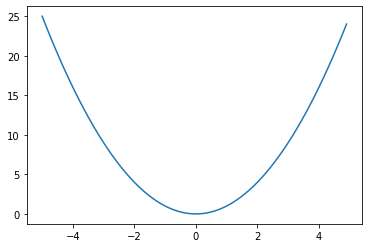

In [9]:
# hide
x = np.arange(-5,5,0.1)
y = x ** 2
let_show.plot(x, y)

จะเห็นว่าคำตอบที่ได้มีการเปลี่ยนทิศทางจากลบเป็นบวก ถ้าเราเพิ่มค่าแนวแกน x เพิ่มขึ้นเรื่อยๆ แบบนี้แสดงว่าถ้า x เราคือ weight และ y คือคำตอบ คำตอบที่ถูกต้องสามารถหาได้จากการปรับ x ไปด้านซ้ายหรือขวา ตอนนี้แหละเราจะเกิด 2 มุมมอง

- มุมมองแรก เอ้ยมันดีนะเรามีโอกาสที่จะหาคำตอบที่ถูกต้องเจอมากขึ้น เจ๋งเลย
- มุมมองที่สอง แย่แล้วคำตอบที่ถูกต้องสามารถหาได้จากการเลื่อน x ไปทางซ้ายหรือ ขวา แล้วเราควรจะเลื่อนไปด้านไหนดี?

ซึ่งพอมามองในมุมมองของ neural network program แล้วหรือเฉพาะเจาจง optmization alogorithm มุมมองที่สองมีความสำคัญและส่งผลต่อการเรียนรู้มากกว่า ดังนั้นเราควรจะเลือก functions ที่ไม่เปลี่ยนทิศทาง
### 3. Activation functions เป็น Non Linear functions
ตามเหตุผลที่อธิบายไปก่อนหน้าที่ถ้าเป็น non linear functions ยิ่ง steps ในโปรแกรมเยอะก็หมายถึง program มีความซับซ้อนมากขึ้น และสามารถแก้ไขปัญหาที่ซับซ้อนได้ ถ้ามองในมุม correlation คือ hidden layer สามารถสร้างปรากฏการณ์ selective correlation ได้ ส่งผลให้แต่ละ layer สร้าง correlation ของตัวเองได้ (ทำให้แต่ละ layer เปรียบเสมือน representation ใหม่ของข้อมูลของเรา) และสุดท้ายส่งผลให้ output layer ไม่ได้ขึ้นอยู่กับแค่ correlation จาก input layer เพียงอย่างเดียว แต่เป็น correlation โดยรวมจาก layers ก่อนหน้าทั้งหมด ซึ่งมีความซับซ้อน
### 4. Activation functions ต้องสามารถคำนวณได้ในเชิงใช้งานจริง รวมถึง derivative ของตัว function เองด้วย
ง่ายๆก็คือสามารถคำนวณได้ และต้องเร็ว เนื่องจาก activation functions จะต้องถูกเรียกบ่อยมากๆ
## เรามาดู Activation functions ที่ถูกใช้ใน Hidden layer กันดีกว่า
functions ที่ใช้กันผมจะขอยกตัวอย่างมา 3 functions
### 1. Sigmoid function
จะทำการให้คำตอบระหว่าง [0, 1] ซึ่งเหมาะมากในการใช้อธิบายความน่าจะเป็นของ node โดย 1 ก็คือมีโอกาส 100% นั่นทำให้ functions นี้ถูกนำไปใช้ทั้งใน hidden และ output layer

In [10]:
def sigmoid(x):
    output = 1 / (1 + np.exp(-x))
    return output

def derivative_of_sigmoid(output):
    derivative_output = output * (1 - output)
    return derivative_output

### 2. tanh function
ในส่วนของ tanh จะให้คำตอบระหว่าง [-1, 1] เนื่องจากมีโอกาสให้คำตอบเป็นจำนวนติดลบด้วย ทำให้ในหลายปัญหามีประโยชน์กว่า sigmoid การทำ weight sum คือการดูว่า inputs ของเราเป็นไปในทิศทางเดียวกับ correlation ที่มีสำหรับ node ที่สนใจไหม (การทำ weight sum มองเป็นการหา similarity หรือแนวโน้มที่ไปทางเดียวกันกับความสัมพันธ์) ถ้าคำตอบเป็นลบแสดงว่ายังมีความสัมพันธ์กันอยู่ระหว่าง input กับ output node แต่เป็นความสัมพันธ์ที่ input มีความตรงกันข้ามกับ output ซึ่ง tanh สามารถอธิบายตรงนี้ได้ แต่ sigmoid จะบอกคำตอบว่าเป็น 0 ซึ่งบอกว่าค่า input ที่เข้ามาปัจจุบันไม่มีความสัมพันธ์กับ output เพราะ sigmoid function ทำให้ node บอกได้แค่ว่ามีความสัมพันธ์ไหม หรือไม่มี

In [11]:
def tanh(x):
    output = np.tanh(x)
    return output

def derivative_of_tanh(output):
    derivative_output = 1 - (output ** 2)
    return derivative_output

### 3.relu function
จะให้ผลลัพธ์เป็นค่าเดิมเมื่อค่ามากกว่า 0 แต่ถ้าค่าน้อยกว่าหรือเท่ากับ 0 จะให้ค่าคำตอบที่เป็น 0 เท่านั้น ผลกระทบจะเหมือน sigmoid เลยนั่นคือจะบอกได้แค่จาก input ที่ได้มามีความสัมพันธ์ไหม หรือไม่มี แต่ที่ต่างคือตัวสมการ sigmoid จะให้ค่า derivative ที่สูงเมื่อ input เข้าใกล้ 0 แต่เมื่อคำตอบที่ได้จาก sigmoid เข้าใกล้ 1 หรือ 0 จะทำให้ค่า derivative เข้าใกล้ 0 ซึ่งส่งผลให้เกิดความ Stickness ซึ่งส่งผลดีในกรณีที่มีมี noise เข้ามาในช่วงที่ weights เราจุดที่มีความมั่นใจในการสร้างคำตอบแล้ว เช่น คำตอบเข้าใกล้ 0 หรือ 1 การที่มี noise ทำให้เกิด error ก็จะไม่รบกวนคำตอบที่ program สร้างขึ้นมา แต่ แต่... ก็มีผลเสียเหมือนกันคือเมื่อ program เรียนรู้แล้วยังไม่เข้าสู่จุดที่เข้าใจบทเรียน แต่ node ของเราบาง node ไปถึงจุด stickness เรียบร้อยแล้ว (ทั้งที่จริงยังต้องปรับขึ้นหรือลงอีก) ส่งผลทำให้เกิดความยากในการเรียนรู้ อาจถึงขั้นต้อง reset เพื่อเรียนรู้ใหม่ 
ดังนั้น relu จะไม่มีในเรื่องของ stickness เนื่องจากเมื่อค่ามากกว่า 0 ค่า derivative จะมีค่าเป็น 1 และเมื่อน้อยกว่า 0 ค่า derivative จะมีค่าเป็น 0 

In [12]:
def relu(x):
    output = (x > 0) * x
    return output

def derivative_of_relu(output):
    derivative_output = output > 0
    return derivative_output

ความจริงในส่วนของ derivative function ค่า input จะต้องเป็น x ไมา่ใช่ output แต่เพื่อความง่ายในการคำนวณเมื่อสร้าง neural network program เราจะใช้แบบนี้ในการคำนวณ (ไม่ส่งผลต่อคำตอบ เพราะจำนวนติดลบก็ถูกแปลงเป็น 0 และ ค่า 0 ใส่คำไปใน derivative function ของ relu ก็ให้คำตอบเป็น 0 อยู่ดี)

## เรามาดู Activation functions ที่ถูกใช้ใน Hidden layer กันดีกว่า
จะขอแบ่งการใช้ activation จากปัญหาออกเป็น 3 รูปแบบนะครับ
### 1. ต้องการคำตอบที่เป็น Numeric
ในที่นี้เราสามารถปล่อยให้ node ไม่ต้องมี activation functions ได้เลย หรือถ้าเราต้องการจำกัดขอบเขตของคำตอบก็ทำการใช้ sigmoid หรือ tanh 
ได้
### 2. มีคำตอบหลายคำตอบและมีคำตอบที่ถูกต้องมากกว่า 1 คำตอบ
ในกรณีนี้ที่มีหลายคำตอบแสดงว่าเราแทนที่คำตอบด้วย vector โดยแต่ละ element ใน vector จะเป็นตัวแทนของคำตอบนั้น และเนื่องจากมีคำตอบที่ถูกต้องมากกว่า 1 คำตอบ เราเลยให้แต่ละ node มีความน่าจะเป็นของตัวเอง ถ้า node ไหนมีความน่าจะเป็นมากกว่า threshold ที่กำหนดก็จะเลือก node นั้นเป็นคำตอบ หมายความว่าแต่ละ node เราจะใช้ sigmoid เป็น activation functionถ้า
### 3. มีคำตอบหลายคำตอบและมีคำตอบที่ถูกต้องเพียงคำตอบเดียว
ถ้าเราใช้ sigmoid แล้วทำการสร้าง neural network program ให้เกิดการเรียนรู้ จะเหมือนเป็นการบอก program ว่า "นี่ๆเจ้า program ใน out layer แต่ละ node ช่วยทำให้ค่าอื่นๆที่ไม่ใช่คำตอบที่ถูกต้องเป็น 0 และให้ node ที่เป็นคำตอบี่ถูกต้องเป็น 1" สมมุติเรามี 3 คำตอบ ได้แก่ [0.2, 0.3, 1]  และคำตอบที่ถูกต้องคือคำตอบที่สาม จะเห็นได้ว่า program เราตอบถุกและมั่นใจมากๆ แต่การเรียนรู้ยังไม่หยุดเนื่องจาก node ที่เหลือยังไม่เป็น 0 ใช่แล้วเป้าหมายของ sigmoid ไม่ใช่แค่ขอคำจอบที่ถูกต้องเป็น 1 แต่คำตอบที่ผิดต้องเป็น 0 ด้วย!

ดังนั้นจากตรงนี้เราเลยต้องมีการปรับปรุงให้มีประสิทธิภาพมากขึ้นนั่นคือเราโฟกัสไปแค่ node ที่เป็นคำตอบที่ถูกแล้วพยายามปรับความน่าจะเป็นให้มากขึ้นเรื่อยๆ ส่วน nodes ที่เหลือจะมีการลดลงของความน่าจะเป็นแบบอัตโนมัติ เอ๊ะทำไมกันนะ? เพราะว่าทุก nodes ใน output vector ทำการแชร์ความน่าจะเป็นกัน (หรือมีความน่าจะเป็นแค่อันเดียว ต่างจาก sigmoid ที่ความน่าจะเป็นจะแยกไปเป็นของแต่ละ node) ทำให้การใช้ sigmoid เป็นการบอกว่า "เฮ้ คำตอบไหนเป็นคำตอบที่ถูกต้องที่สุด ก้ปรับให้คำตอบนั้นค่าความน่าจะเป็นออกมามากที่สุด node อื่นที่ไม่ใช่คำตอบก็จะมีความน่าจะเป็นที่น้อยลงเองอัตโนมัติ"

แล้วคำนวณยังไงนะ sigmoid ให้มองเป็น 3 ขั้นตอนง่าย
1. ทำการ weight sum ระหว่าง input vector และ weight vector (ปกติที่เราทำกันมา)
2. ทำการ คำนวณ exponential function โดยที่เลขฐานเป็น e
3. นำค่าแต่ละ node มาตั้งและหารด้วย ค่าของ node ทั้งหมดรวมกัน (หาความน่าจะเป็นของแต่ละ node)

In [13]:
def softmax(x):
    expoential_output = np.exp(x)
    output = expoential_output / np.sum(expoential_output)

## มาเริ่มสร้าง Neural Network program สำหรับ Dataset กันดีกว่า

In [14]:
alpha, iterations, hidden_layer1 = 0.01, 500, 32

เริ่มแรกมากำหนด learning rate กันก่อนให้เท่ากับ 0.003 (ค่ามากน้อยขึ้นอยู่กับข้อมูลและโครงสร้าง program เรายิ่งค่ามากยิ่งมีการปับ weight มากในครั้งเดียว และยิ่งค่าน้อยก็ยิ่งปรับ weight น้อย มีผลกับเวลาในการเรียนรู้) ต่อมาคือ iteration (epochs) ใช้บอกว่าเราจะให้โปรแกรมเห็น dataset ทุกตัวอย่างทั้งหมดกี่ครั้ง และสุดท้ายจำนวน node ใน hidden layer

In [15]:
weight_0_1 = 0.2 * np.random.random(size=(x_train.shape[1], hidden_layer1)) - 0.1
weight_1_2 = 0.2 * np.random.random(size=(hidden_layer1, 10)) - 0.1

- weight_0_1 คือ weight ระหว่าง layer 0 (input layer) กับ  layer 1 (hidden layer 1)
- weight_1_2 คือ weight ระหว่าง layer 1 (hidden layer 1) กับ  layer 2 (output layer)

โดยเราทำการเลื่อนค่าให้มีค่า mean อยู่ที่ - 0.1 และ มีการกะจายของข้อมูลเป็น 0.2 (scale)

In [16]:
for j in range(iterations):
    error, correct_count = 0, 0
    
    for i in range(x_train.shape[0]):
        layer_0 = x_train[i:i+1]
        layer_1 = relu(layer_0.dot(weight_0_1))
        layer_2 = layer_1.dot(weight_1_2)
        
        error += np.sum((layer_2 - y_train[i:i+1]) ** 2)
        correct_count += int(np.argmax(layer_2) == np.argmax(y_train[i:i+1]))
        
        layer_2_delta = layer_2 - y_train[i:i+1]
        layer_1_delta = derivative_of_relu(layer_1) * (layer_2_delta.dot(weight_1_2.T))
        
        weight_0_1 -= alpha * layer_0.T.dot(layer_1_delta)
        weight_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
    
print(f'Error: {error / x_train.shape[0]}')
print(f'Accuracy: {correct_count / x_train.shape[0]}')

Error: 0.002805354217390215
Accuracy: 0.998


สังเกตว่าเรามีการปรับ weights ในทุกๆตัวอย่างของ training set (1,000 ตัวอย่าง) ดังนั้นเราจะมีการปรับ weights ทั้งหมด 1,000 x 350 (iteration)  เป็น 350,000 ครั้ง! แต่ว่าการทำแบบนี้การปรับ weights แต่ละครั้งด้วยตัวอย่างเดียวอาจทำให้บางครั้งของการปรับ weights เกิด noise ได้ทำให้ weights เดินผิดเพี้ยนไป แต่โดยรวม weights แต่ละค่าก็พยายามมุ่งเข้าหาค่าของ weights ที่ควรจะเป็นถ้าเราลองวาดเป็นกราฟการเดินทางก็จะมี noise เกิดขึ้นบ้างแต่ trend โดยรวมก็ยังเหมือนเดิม จริงๆการปรับ weights สามารถทำได้ 3 แบบ
1. stochastic gradient descent 
2. full gradient descent 
3. batch gradient descent 

โดยเกิดจากว่าแรกเริ่มใช้ full gradient descent แต่เมื่อคลังข้อมูลเรามีขนาดใหญ่มากขึ้นเราไม่สามารถใส่ข้อมูลทั้งหมดใน memory รวมถึงการอัพเดท weights ครั้งหนึ่งใช้เวลานานมาก เช่นเมื่อต้องสร้าง program จาก ImageNet dataset ซึ่งมีภาพหลักล้านรูป ถ้าเรารอให้ครบทั้ง dataset แบะอัพเดททีหนึ่งเราจะใช้เวลาในการ training นานมากๆ ดังนั้นจึงเกิดแนวคิดว่าแล้วทำไมเราไม่ใส่ตัวอย่างหนึ่งและปรับ weights หนึ่งที ซึ่งจะทำให้เรามีการปรับ weights ได้หลายครั้งมากต่อการใช้ dataset ทั้งหมด 1 รอบ แต่อย่างที่บอกคือ เราอัพเดทได้เร็วก็จริงแต่การอัพเดทแต่ละครั้งมีโอกาสเป็น noise ดังนั้นเราเลยอยู่กึ่งกลางละกันโดยการใช้ batch gradient descent นั่นคือเรามีโอกาสอัพเดทมากกว่าการใช้ full gradient descent  และการอัพเดทแต่ละครั้งก็มีโอกาสเกิด noise น้อยกว่าและมีโอกาสมุ่งเข้าสู่ค่า weights ที่เป็นคำตอบมากกว่า เนื่องจากมีการเฉลี่ยกันของหลายๆตัวอย่างถึงแม้จะไม่ได้แนวโน้มการอัพเดทที่ดีเท่า full dataset แต่ก็เป็นแนวโน้มการอัพเดทที่ดีกว่าการอัพเดทจากทีละหนึ่งตัวอย่าง (หมายความว่าอาศัยจำนวนการอัพเดทน้อยกว่าแบบ stochastic gradient descent อีกด้วย) ยิ่งไปกว่านั้นการทำแบบ batch ยังเป็นการใช้ optimization library สำหรับ linear algebra อย่างคุ้มค่าเมื่อเราทำการอัพเดท weights ทั้งหมด 10 iterations แบบ batch จะมีความเร็วกว่าแบบ stochastic gradient descent อีกด้วย

จะเห็นว่าผลลัพธ์ออกมาเป็น accuracy 99.9% Wow! แต่ แต่... อย่าลืมว่าอันนี้เราทพสอบกับคลังข้อมูลที่ program เราเรียนรู้โดยตรง เดี๋ยวเราลองมาทดสอบกับคลังข้อมูลที่ program ยังไม่เคยเห็นมาก่อน

In [17]:
error, correct_count = 0.0, 0

for i in range(x_test.shape[0]):
    
    layer_0 = x_test[i:i+1]
    layer_1 = relu(layer_0.dot(weight_0_1))
    layer_2 = layer_1.dot(weight_1_2)

    error += np.sum((layer_2 - y_test[i:i+1]) ** 2)
    correct_count += int(np.argmax(layer_2) == np.argmax(y_test[i:i+1]))
    
print(f'Error: {error / float(x_test.shape[0])}')
print(f'Accuracy: {correct_count / x_test.shape[0]}')

Error: 0.40306746534485255
Accuracy: 0.8093


จะเห็นว่าเมื่อเราทดสอบกับ training set เราได้ 99.9% แต่พอมาทดสอบกับ testing set กับได้ 82.71% ซึ่งต่างกันพอสมควร งั้นแปลว่า program เรายังเอามาใช้กับข้อมูลที่ไม่เคยเห็นได้ดีพอทำไมกันนะ?

มีหลากหลาย weights configuration ที่ทำให้ค่า error ต่ำและ program ออกมาดีเมื่อทดสอบกับ training set แต่เป้าหมายเราคือการหา weights ที่สามารถทำให้ทดสอบกับข้อมูลที่ไม่เคยเห็นและได้คำตอบที่ถุกต้องนั่นคือเมื่อทดสอบกับ testing set จะต้องได้ผลััพธืออกมาดี (Generalization) weights ที่เฉพาะเจาะจงกับ training set (ทำให้ค่าที่ทดสอบออกมาดี) เราเรียกว่า overfitting (ทำการจำข้อมูลในคลังข้อมูลแล้วมาตอบคำถามเวลาสอบ) ดังนั้นเราต้องทำยังไงที่จะทำให้เราหา weights ที่ generalization (สร้างองค์ความรู้ออกมาเพื่อใช้ผลิตคำตอบ ต่างจากการจำ) ได้กับข้อมูลที่ไม่ได้อยู่ใน training set ซึ่งบ่อยครั้งที่เมื่อเราลด generalization error จะมีราคาที่ต้องแรกคือ training error จะเพิ่มขึ้น แต่ก็เป็นสิ่งที่รับได้เพราะสุดท้าย training error ที่น้อยมากๆ ก็ไม่สามารถนำไปใช้ประโยชน์จริงได้ แต่กลับ generalization error ที่น้อยเราสามารถนำมันไปใช้ประโยชน์ได้และมั่นใจได้ว่า program เราจะสามารถทำงานกับข้อมูลที่มันไม่เคยเห็นได้ แล้วเราจทำยังไงดี
 # ถึงเวลาการทำ regularization
 การทำ regularization มีหลายแบบตั้งแต่การปรับสมการคำนวณค่า error หรือการเปลี่ยนแปลงโครงสร้างของตัว program (ตัวแปร interact กันยังไง) ขอยกตัวอย่างคร่าวๆโดยการปรับปรุง error โดยเป็นการควบคุม capacity ของ program ในการเรียนรู้ ถ้า capacity สูงเกินไปและปัยหาไม่ซับซ้อนตัว program ก็จะเลือกทางเลือกที่ง่ายที่สุดนั่นคือการจดจำตำตอบ ดังนั้นเราจึงต้องจำกัด capacity ให้เหมาะสมที่จะส่งเสริมให้ program เกิดการเรียนรู้และสร้างองค์ความรู้ขึ้นมาจริงๆ

error = (output - true_output) ** 2

เราทำการเพิ่มไปอีกสมการหนึ่ง

error = (output - true_output) ** 2 + sum(weight ** 2)

จะเห็นว่าเป็นการเอา weights มารวมใน error ด้วย เพื่อเป็นการบอกว่าถ้า weights ไหนไม่ได้มีผลกลับคำตอบจริงๆให้ค่ามุ่งหน้าเข้าสู่ 0 รวมถึง weights ที่มีผลคล้ายๆกันกับคำตอบให้ทำการแชร์ค่ากัน เช่น weight_1 แทนที่จะเป็น 1 ก็ให้เหลือ weight_1 กับ weight_2 เป็น 0.5 แทน การทำแบบนี้ weight แต่ละตัวแปรจะไม่สามารถมีค่าที่มากเกินไปได้ weights แต่ละอันต้องมีการแชร์ และ weights ที่เป็น noise ก็จะต้องถูกปิด (ค่าเข้าใกล้ 0)

แต่สำหรับครั้งนี้ผมจะมาเน้นที่การทำ regularization โดยการปรับตัว program (architecture) โดยการใช้สิ่งที่เรียกว่า dropout
# ยินดีต้อนรับ Dropout
การใช้ dropout คือการ random เพื่อทำการ shut down node ที่เลือกลงไป (แทนค่าเป็น 0) ทำไมถึงใช้งานได้ละ?
##  การสร้าง neural network program มาเยอะๆหลาย program แล้วทำการเฉลี่ยคำตอบ (Ensembling)
เมื่อเราทำการสร้างมาหลายๆ program แน่นอนว่าแต่ละ program ก็จะมีการเรียกรู้ที่ต่างกัน และผิดพลาดต่างกัน เรา overfitting ก็มีการ overfitting ที่ต่างกัน เมื่อ program เรียนรู้จะเรียนรู้สิ่งที่เป็น concept หลักก่อน จากนั้นถ้ายังเหลือ capacity ก็จะเริ่มเรียนรู้รายละเอียดของตัวอย่างนั้นๆ (fine grained detail)เมื่อเรานำทั้งหมดมาเฉลี่ยกันก็จะมีการ cancel ความผิดพลาด ออกไปเหลือแค่ concept หลักที่มีการเรียนรู้ร่วมกัน

แต่การสร้างหลายๆ programs และให้มันเรียนรู้ มันใช้เวลายเอะมากเลยนะ ดังนั้น dropout จึงเข้ามานั่นคือเราสร้าง program แค่อันเดียวแล้วทุกครั้งที่มีการใส่ inputs เข้าไปในโปรแกรมเราจะทำการสุ่มปิด nodes ใน program เท่ากับว่าเรามีการสร้าง sub program (sub neural network) ขึ้นมาและที่สำคัญคือ sub program มีจำนวน weights น้อยลงทำให้ลดการเกิด overfitting และถ้าเรามองการทำ dropout คือการสร้าง sub program แสดงว่า sub program หนึ่ง เรียนรู้ batch ของ training set และอีก sub program หนึ่งเรียนรู้อีก batch ของ training set เปรียบเสมือน เราสร้าง 2 program ที่เรียนรู้ข้อมูลคนละส่วน เราเรียกว่า การทำ begging

แต่ dropout ให้เรามากว่านั้นเนื่องจาก sub program ถูกสร้างออกมาจาก program ใหญ่แสดงว่า weights ต้องมีการแชร์กันระหว่าง sub program จำได้ไหม การทำ regularization โดยการปรับสมการ error คือการจำกัดทำให้ค่า weights มุ่งหน้าเข้าสู่ 0 แต่! การทำให้ sub program มีการแชร์ weights กันทำให้ค่า weights ถูกจำกัดและปรับมุ่งหน้าเข้าสู่ค่าที่มันควรจะเป็น (ไม่ใช่ 0)จาก sub program อื่นๆ นี่ยิ่งทำให้ dropout ทรงพลังขึ้นไปอีก 
แล้วสุดท้ายเราจะมาเฉลี่ยกันยังไง? ถ้า program มี hidden layer แค่ 1 layer การสุ่มเอา sub program มา (จำนวนมากหรือทั้งหมดถ้า node มีไม่มาก) แล้วทำการเฉลี่ยคำตอบก่อนเข้า activation function ใน output nodes จะมีค่าเท่ากับการปิดการทำงานของ dropout หรือการใช้ full program ในการผลิตคำตอบ แล้วนำคำตอบที่ได้มาหารด้วย ratio ของ nodes ที่ปิดไปใน hidden layer

แต่ถ้าเรามี hidden layer มากกว่า 2 การทำแบบเดิมจะไม่ให้ค่าที่ทำกันแล้วแต่ก็ยังสามารถเป็นค่าประมาณที่ใช้จริงได้อยู่
# พอแล้ว Theory มาลงมือจริงกันเลยดีกว่า

In [18]:
alpha, iterations, hidden_layer1 = 0.01, 500, 32
weight_0_1 = 0.2 * np.random.random(size=(x_train.shape[1], hidden_layer1)) - 0.1
weight_1_2 = 0.2 * np.random.random(size=(hidden_layer1, 10)) - 0.1

เหมือนเดิม เริ่มแรกมากำหนด learning rate กันก่อนให้เท่ากับ 0.003 (ค่ามากน้อยขึ้นอยู่กับข้อมูลและโครงสร้าง program เรายิ่งค่ามากยิ่งมีการปับ weight มากในครั้งเดียว และยิ่งค่าน้อยก็ยิ่งปรับ weight น้อย มีผลกับเวลาในการเรียนรู้) ต่อมาคือ iteration (epochs) ใช้บอกว่าเราจะให้โปรแกรมเห็น dataset ทุกตัวอย่างทั้งหมดกี่ครั้ง และสุดท้ายจำนวน node ใน hidden layer 

- weight_0_1 คือ weight ระหว่าง layer 0 (input layer) กับ  layer 1 (hidden layer 1)
- weight_1_2 คือ weight ระหว่าง layer 1 (hidden layer 1) กับ  layer 2 (output layer)

โดยเราทำการเลื่อนค่าให้มีค่า mean อยู่ที่ - 0.1 และ มีการกะจายของข้อมูลเป็น 0.2 (scale)

In [19]:
for j in range(iterations):
    error, correct_count = 0, 0
    
    for i in range(x_train.shape[0]):
        layer_0 = x_train[i:i+1]
        layer_1 = relu(layer_0.dot(weight_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * (1/0.5)
        layer_2 = layer_1.dot(weight_1_2)
        
        error += np.sum((layer_2 - y_train[i:i+1]) ** 2)
        correct_count += int(np.argmax(layer_2) == np.argmax(y_train[i:i+1]))
        
        layer_2_delta = layer_2 - y_train[i:i+1]
        layer_1_delta = derivative_of_relu(layer_1) * (layer_2_delta.dot(weight_1_2.T))
        layer_1_delta = layer_1_delta * dropout_mask
        
        weight_0_1 -= alpha * layer_0.T.dot(layer_1_delta)
        weight_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
    
test_error, test_correct_count = 0.0, 0

for i in range(x_test.shape[0]):

    layer_0 = x_test[i:i+1]
    layer_1 = relu(layer_0.dot(weight_0_1))
    layer_2 = layer_1.dot(weight_1_2)

    test_error += np.sum((layer_2 - y_test[i:i+1]) ** 2)
    test_correct_count += int(np.argmax(layer_2) == np.argmax(y_test[i:i+1]))


print(f'Error: {error / x_train.shape[0]}')
print(f'Accuracy: {correct_count / x_train.shape[0]}')
print(f'Test Error: {test_error / float(x_test.shape[0])}')
print(f'Test Accuracy: {test_correct_count / x_test.shape[0]}')

Error: 0.2771398481038192
Accuracy: 0.869
Test Error: 0.3636057630375286
Test Accuracy: 0.8138


จะเห็นได้ว่า dropout ทำให้ผลการทดสอบกับ testing set ดีขึ้น หมายความว่าทำให้การ generalization ดีขึ้น ส่วนมากการทำให้ program มีการ generalization ดีขึ้นจะต้องมีการแลกเปลี่ยนกับผลลัพธ์ metric ของ training set ในกรณีนี้ยังเราสามารถลองเพิ่มจำนวน iterations ได้เพื่อดูว่าเรายังสามารถปรับปรุง program ให้ดีขึ้นไปได้อีกไหม โดยต้องอย่าลืมตรวจสอบ generalization gap (ความต่างของ error ระหว่าง training และ testing set) มีความกว้างมากไหม ถ้ากว้างมากอาจหมายความว่าเรา overfitting เรียบร้อยแล้ว
> Note: ตอนนี้เรากำลังใช้ testing set ในการปรับตัวแปรที่จำเป็นในการสร้าง program เช่นจำนวน iterations หรือ learning rate การทำแบบนี้เป็นการพยายาม overfitting ทางอ้อมกับ testing set ดังนั้นเพื่อป้องกันสถานการณ์นี้เราจะมี validation set มาขั้นกลาง โดยเราใช้ validation set นี้ในการปรับ hyperparameters (parameters ที่ program ไม่ได้ปรับตรงๆในช่วงเรียนรู้ แต่เป็นตัวแปรสำคัญและมีผลต่อการเรียนรู้)

# สุดท้ายแล้ว ถ้าเราอยากทำ Batch Gradient Descent ละจะทำยังไง
เราทำการนำตัวแปร gradients ของทุก nodes ใน output layer จากแต่ละ example มาหารด้วยจำนวนสมาชิกใน batch เพราะการปรับ weights ของเราจะขึ้นอยู่กับตัวอย่างทั้งหมดใน batch นั้นเราเลยต้องทำการเฉลี่ยออกมา
> Important: ความจริงเรื่องการหารมันเป็นผลเนื่องมาจากสุดท้ายเราคำนวนหา error ของแต่ละตัวอย่างและนำค่า error ทั้งหมดของแต่ละตัวอย่างมารวมกัน ตรงจุดนี้เราทำการหารด้วยตัวอย่างทั้งหมด นั่นทำให้พอเราหา gradients ของแต่ละ nodes จากแต่ละตัวอย่าง จะต้องหารด้วยจำนวนสมาชิกใน batch แต่ถ้าสมการ error เราไม่มีการหารด้วยตัวอย่างทั้งหมด ตอนเราหา gradients ก็ไม่ต้องหารจำนวนสมาชิกทั้งหมดใน batch

In [27]:
batch_size = 100
alpha, iterations, hidden_layer1 = 0.01, 3000, 32
weight_0_1 = 0.2 * np.random.random(size=(x_train.shape[1], hidden_layer1)) - 0.1
weight_1_2 = 0.2 * np.random.random(size=(hidden_layer1, 10)) - 0.1
 
for j in range(iterations):
    error, correct_count = 0, 0
    
    for i in range(int(x_train.shape[0] / batch_size)):
        batch_start, batch_end = (i * batch_size,(i+1) * batch_size)
        layer_0 = x_train[batch_start:batch_end]
        layer_1 = relu(layer_0.dot(weight_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * (1/0.5)
        layer_2 = layer_1.dot(weight_1_2)
        
        error += np.sum((layer_2 - y_train[batch_start:batch_end]) ** 2)
        for k in range(batch_size):
            correct_count += int(np.argmax(layer_2[k:k+1]) == np.argmax(y_train[batch_start + k:batch_start + k + 1]))
        
        layer_2_delta = (layer_2 - y_train[batch_start:batch_end]) * 1 / batch_size
        layer_1_delta = derivative_of_relu(layer_1) * (layer_2_delta.dot(weight_1_2.T))
        layer_1_delta = layer_1_delta * dropout_mask
        
        weight_0_1 -= alpha * layer_0.T.dot(layer_1_delta)
        weight_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
    
test_error, test_correct_count = 0.0, 0

for i in range(x_test.shape[0]):

    layer_0 = x_test[i:i+1]
    layer_1 = relu(layer_0.dot(weight_0_1))
    layer_2 = layer_1.dot(weight_1_2)

    test_error += np.sum((layer_2 - y_test[i:i+1]) ** 2)
    test_correct_count += int(np.argmax(layer_2) == np.argmax(y_test[i:i+1]))


print(f'Error: {error / batch_size}')
print(f'Accuracy: {correct_count / x_train.shape[0]}')
print(f'Test Error: {test_error / float(x_test.shape[0])}')
print(f'Test Accuracy: {test_correct_count / x_test.shape[0]}')

Error: 3.449173614715377
Accuracy: 0.835
Test Error: 0.3309046876836692
Test Accuracy: 0.8426


สังเกตว่าการใช้ batch gradient descent จะเป็นการใช้ประโยชน์จากการ optimization ของ linear algebra ทำให้การอัพเดท weights 1 ครั้งเป็นการใช้ตัวอย่างเป็นกลุ่ม ส่งผลให้การประมวลผล training set ใน 1 iteration มีความเร็วมากขึ้น ส่งผลให้เราสามารถเพิ่มจำนวน iterations ได้มากขึ้น นอกจากนี้ถ้ามีการดู error ในทุกๆ iterations ตัว error จะมีแนวโน้มที่มีความเรียบเนียน (smooth) กว่าการอัพเดท weights ที่ละตัวอย่าง

ก่อนจากกัน ทุกคนสามารถลองเล่นโดยการปรับ การ random weights ให้เหมาะสมยิ่งขึ้น (ป้องกัน vanishing gradient), หรือการทำ gradient clip (เพื่อป้องกัน exploding gradient) และ activation functions ดูได้ เพื่อดุประสิทธิภาพของตัว program เมื่อมีการปรับเปลี่ยน activation functions เนื่องจากตัวอย่างที่ได้ทำมาทั้งหมดจะเป็นการใช้ relu ส่วน output nodes ไม่ได้ใช้ activation functions ซึ่งจากโจทย์ข้อนี้ควรจะใช้ softmax หรือ sigmoid ใน output layers เพื่อให้คำตอบอยู่ในช่วง [0, 1] 
> Note: ถ้าใช้ sigmoid หรือ tanh เป็น hidden layer activation function อย่าลืม random weights ให้เข้าใกล้ 0 เพื่อที่ค่า derivatives จะได้ไม่เข้าใกล้ 0 เกินไปจน program ยากที่จะเรียนรู้หรือปรับปรุง weights

หวังว่าทุกคนที่เข้ามาอ่านจะสนุกและได้ความรู้กันนะครับ

"If you cannot sleep in the night, you need more time to understand it"

Burin Sirisrimungkorn